In [1]:
from fastai.vision import *
from fastai import *
from fastai.data_block import *

from pathlib import Path

from unet import VolumetricUnet, dice_loss, dice_score, predict, plot_predictions

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import FloatTensor as FT

In [2]:
torch.cuda.set_device(4)

In [3]:
!ls /data/public/Segmentation_Dataset/MR_Dataset/train

brain_atlas  normalized_raw_images  skull_stripped   ventricle_masks
brain_masks  raw_images		    ventricle_atlas


In [4]:
data_path = Path("/data/public/Segmentation_Dataset/MR_Dataset")
trn_img = sorted(list(Path(data_path/"train/skull_stripped").iterdir()))
trn_mask = sorted(list(Path(data_path/"train/ventricle_masks").iterdir()))
valid_img = sorted(list(Path(data_path/"validation/skull_stripped").iterdir()))
valid_mask = sorted(list(Path(data_path/"validation/ventricle_masks").iterdir()))

In [5]:
print(f"Size of Train Dataset: {len(trn_img)} Images")
print(f"Size of Validation Dataset: {len(valid_img)} Images")

Size of Train Dataset: 112 Images
Size of Validation Dataset: 15 Images


In [14]:
class MRI_3D_Dataset(object):
    def __init__(self, images, ventricles, transform=None):
        self.images = images
        self.ventricles = ventricles
        self.transform = transform
    
    def __getitem__(self, index):
        image_voxel = np.load(self.images[index]).astype(np.float32)
        mask_voxel = np.load(self.ventricles[index]).astype(np.float32)
        if self.transform:
            image_voxel, mask_voxel = self.transform(image_voxel, mask_voxel)
        return FT(image_voxel[None,:]), FT(mask_voxel) 

    def __len__(self):
        return len(self.images)
    
train_ds = MRI_3D_Dataset(trn_img, trn_mask)
valid_ds = MRI_3D_Dataset(valid_img, valid_mask)   

data = DataBunch.create(train_ds=train_ds, valid_ds=valid_ds, bs=3)

In [15]:
unet = VolumetricUnet(in_channel=1, out_channel=4, num_classes=1)

In [16]:
learner = Learner(data=data, model=unet)

In [17]:
learner.loss_func = dice_loss
learner.metrics = [dice_score]

In [18]:
learner.to_fp16();

In [19]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


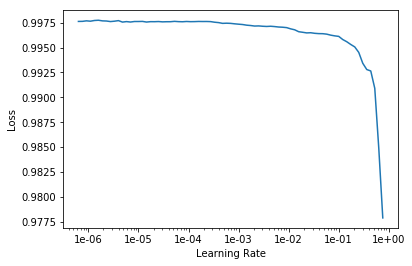

In [20]:
learner.recorder.plot()

In [21]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.995527,0.997221,0.002779
2,0.962022,0.714799,0.310624
3,0.762578,0.470321,0.538228
4,0.546109,0.268197,0.747497
5,0.427260,0.260503,0.753904


In [22]:
learner.save('DL_Ventricles_NoTL_MR_5_epochs_3e-2')

In [23]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.309541,0.591145,0.407371
2,0.317044,0.236272,0.770384
3,0.297729,0.280066,0.722307
4,0.275770,0.213645,0.789900
5,0.269535,0.203288,0.800280


In [24]:
learner.save('DL_Ventricles_NoTL_MR_10_epochs_3e-2')

In [25]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.253690,0.222784,0.779562
2,0.267465,0.304810,0.696918
3,0.254541,0.198168,0.805960
4,0.246522,0.196783,0.805590
5,0.235782,0.178646,0.824653


In [26]:
learner.save('DL_Ventricles_NoTL_MR_15_epochs_3e-2')

In [27]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.224422,0.354699,0.647123
2,0.228229,0.399914,0.600438
3,0.223814,0.258708,0.742799
4,0.214903,0.155365,0.846758
5,0.205704,0.157697,0.844662


In [28]:
learner.save('DL_Ventricles_NoTL_MR_20_epochs_3e-2')

In [29]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.203446,0.176521,0.825183
2,0.209675,0.155349,0.846095
3,0.203832,0.189644,0.812281
4,0.196329,0.191278,0.810402
5,0.190377,0.148144,0.853651


In [30]:
learner.save('DL_Ventricles_NoTL_MR_25_epochs_3e-2')

In [31]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,dice_score
1,0.190736,0.189890,0.810956
2,0.203417,0.167413,0.833897
3,0.195192,0.162159,0.839152
4,0.185955,0.146477,0.854989
5,0.181289,0.145465,0.856062
